# Distribución de probabilidad Binomial
1. Una distribución de probabilidad es una distribución que indica la probabilidad de cada valor de la variable aleatoria. 
2. A menudo se expresa como gráfica, tabla o fórmula.
3. Una distribución de probabilidad es como una distribución de frecuencias, 
    + en dónde la frecuencia o valor correspondiente a cada valor de x es un valor de probabilidad.
###### Ver Distribución discreta de probabilidad binomial en: https://www.chreinvent.com/recursos/distribuci%C3%B3n-binomial    

In [12]:
import math
from statistics import mean, median, mode, variance, stdev
from itertools import accumulate
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

## Auditoría. Muestreo para aplicación de impuestos
La Hemingway Financial Company prepara devoluciones de impuestos para individuos. (Su lema: “También escribimos extraordinarias novelas de ficción”.). 
+ Según el Internal Revenue Service, los individuos que ganan entre $25,000 y $50,000 se auditan en una proporción del 1%. La Hemingway Company prepara cinco devoluciones de impuestos para individuos que están en esa categoría de impuestos, y se audita a tres de ellos.
    + a. Calcule la probabilidad de que, cuando se seleccione al azar a cinco personas que ganan entre $25,000 y $50,000, se audite exactamente a tres de ellas.
    + b. Calcule la probabilidad de que se audite al menos a tres.
    + c.  Con base en los resultados anteriores, ¿qué se puede concluir acerca de los clientes de Hemingway? ¿Sólo son desafortunados o están siendo blanco de las auditorías?


### Parametros

In [13]:
# Definición de parámetros del problema
n = 5   # Número de tabletas de aspirina
p = 0.01  # Probabilidad de ser seleccionado
x = [ x for x in range(n+1)] # x varia de 0 a n

### Construcción de la distribución binomial

In [14]:
# Calculo de la distribución de probabilidad binomial
# Lista con las probabilidades simples para cada x
d_prob = [binom.pmf(x, n, p) for x in range(n + 1)]

# Lista con las probabilidades acumuladas para cada x
d_prob_ac = list(accumulate(d_prob))

# Lista con las probabilidades acumuladas en orden inverso
d_prob_ac_inv = list(accumulate(d_prob[::-1]))[::-1]

# Imprimir cada número con dos decimales usando f-string # for num in dist_prob_ac: print(f"{num:.2f}")

### Tabla y Gráficos
+ Probabilidades: La suma de la probabilidad debe dar 1
+ Media: La suma-producto de x por su probabilidad debe dar la media
+ Varianza: La suma-producto de x al cuadrado por la probabilidad menos la media debe dar la varianza
+ Desviación Estandard: La raiz cuadrada de la varianza debe dar la desviación estandard

In [15]:
# Dataframe: Tabla de datos
df_tb = pd.DataFrame(
    {
        'x': x,
        'p': d_prob,
        'x.p': [x[i] * d_prob[i] for i in range(n+1)],
        'xx.p': [x[i]**2 * d_prob[i] for i in range(n+1)],
        'p-acu': d_prob_ac,
        'p-acr': d_prob_ac_inv      
    }
)
print(df_tb.round(3).set_index('x'))


       p    x.p   xx.p  p-acu  p-acr
x                                   
0  0.951  0.000  0.000  0.951  1.000
1  0.048  0.048  0.048  0.999  0.049
2  0.001  0.002  0.004  1.000  0.001
3  0.000  0.000  0.000  1.000  0.000
4  0.000  0.000  0.000  1.000  0.000
5  0.000  0.000  0.000  1.000  0.000



Estadísticos:
Sumatoria de probabilidades: 0.9999999999999997
Media y Esperanza          : 0.049999999999999996
Varianza                   : 0.049
Desviación Estandard       : 0.222
Revisión de estadísticos por scipy:
mean: 0.05, var: 0.05, skew: 4.40, kurt: 19.00.


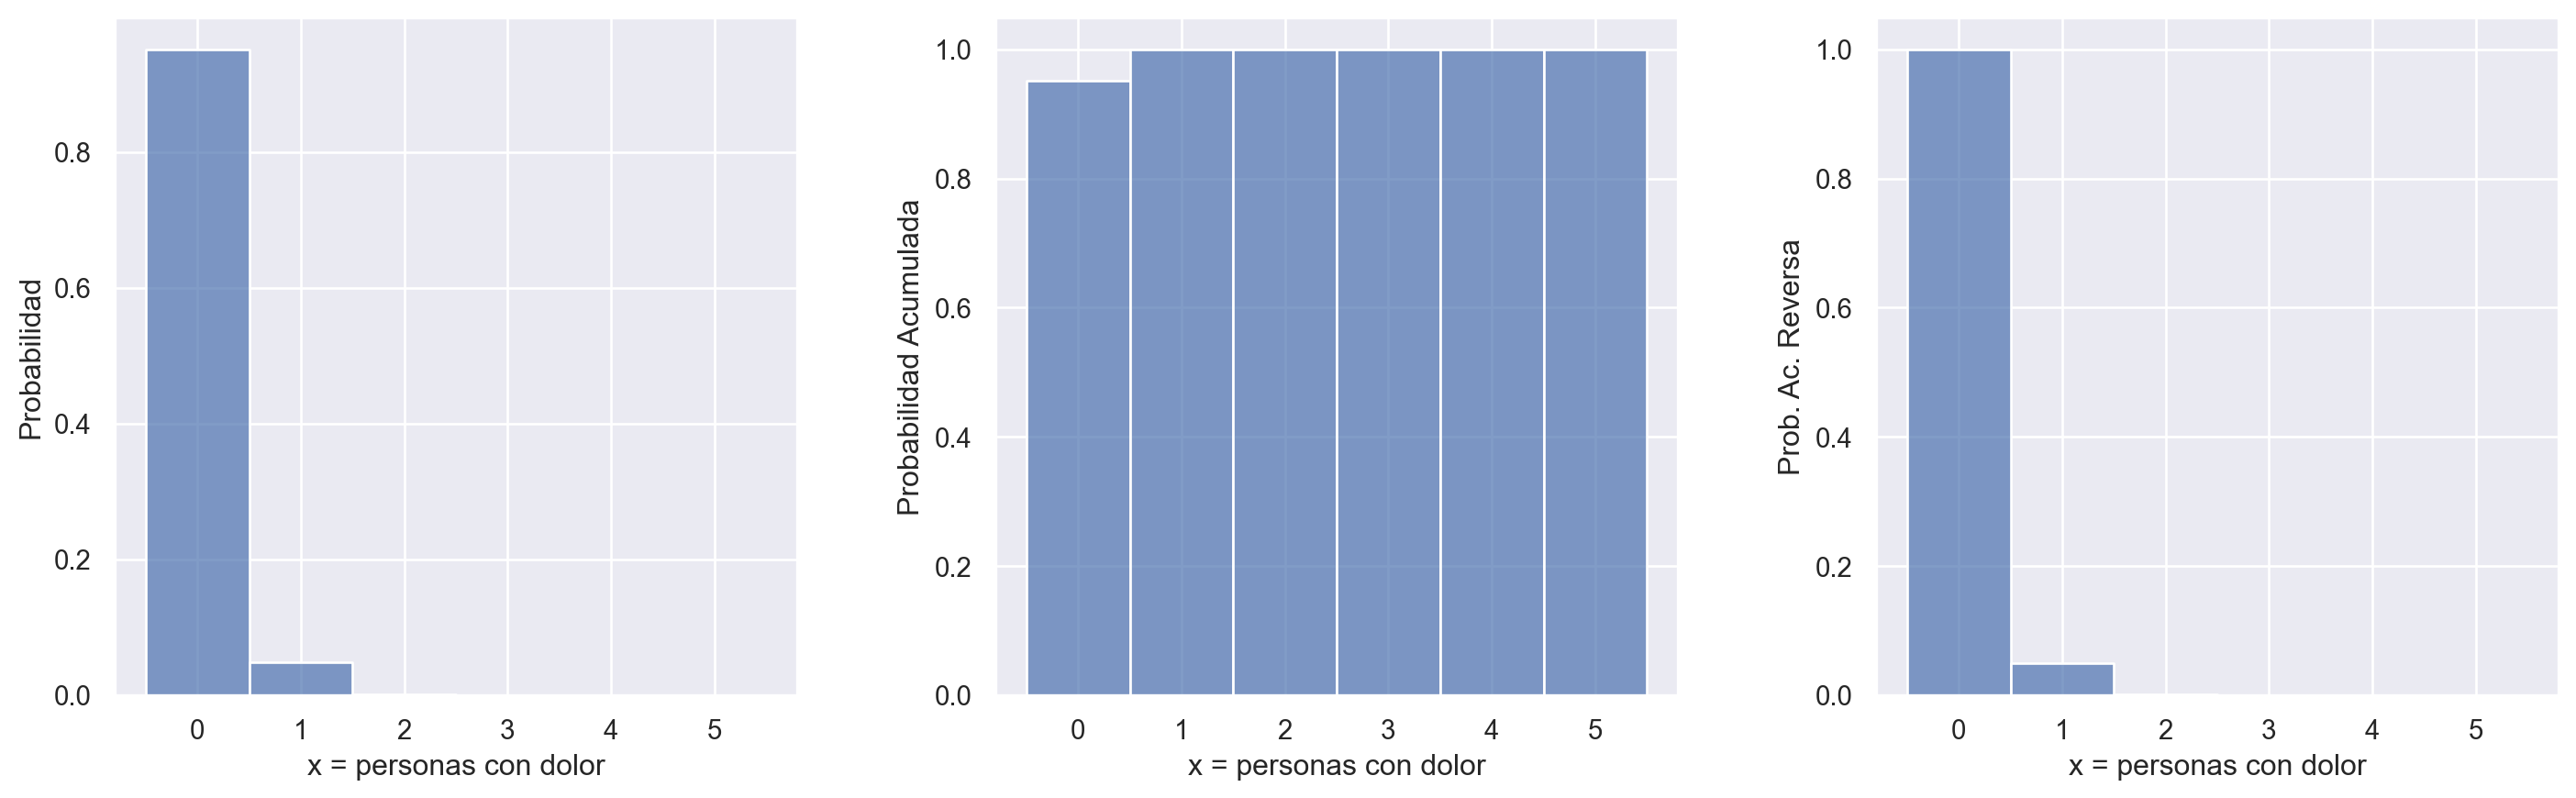

In [16]:

# Estadisticos: Calculo de la media de la distribución de probabilidad
print(f"\nEstadísticos:")

# Calculos: sumatoria de probabilidades, media, varianza y desviación estandard
sumprob = df_tb.p.sum()
media = df_tb['x.p'].sum()
sum_xx_p = df_tb['xx.p'].sum()
varianza = sum_xx_p - media ** 2
desvstan = math.sqrt(varianza)

# Impresión de estadísticos
print(f"Sumatoria de probabilidades: {sumprob}")
print(f"Media y Esperanza          : {media}")
print(f"Varianza                   : {varianza:.3f}")
print(f"Desviación Estandard       : {desvstan:.3f}")

# Revisión de estadísticos por Scipy
# La función de distribución binomial de SciPy binom.stats devuelve: Los momentos de primero a cuarto orden:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

print("Revisión de estadísticos por scipy:")
print(f"mean: {mean:.2f}, var: {var:.2f}, skew: {skew:.2f}, kurt: {kurt:.2f}.")

# Gráficos
# Distribución de probabilidad binomial
f = mpl.figure.Figure(figsize=(15, 5))
sf1, sf2, sf3 = f.subfigures(1, 3)

# Visualización Probabilidades
(
    so.Plot(df_tb, x="x", y="p")
    .add(so.Bars(),)
    .label(x="x = personas con dolor", y="Probabilidad")
    .on(sf1)
    .plot()
)

# Visualización Probabilidades Acumuladas
(
    so.Plot(df_tb, x="x", y="p-acu")
    .add(so.Bars())
    .label(x="x = personas con dolor", y="Probabilidad Acumulada")
    .on(sf2)
    .plot()
)

# Visualización Probabilidades Acumuladas Invertidas
(
    so.Plot(df_tb, x="x", y="p-acr")
    .add(so.Bars())
    .label(x="x = personas con dolor", y="Prob. Ac. Reversa")
    .on(sf3)
)



##### Observaciones:
+ El numero de personas que se espera encontrar, que ganen entre 25K y 30K, no llega a 1: 0.049. (Esperanza: 0.049999999999999996)
    + La probabilidad de que se encuentre 0 personas es 0.951 y la probabilidad que se encuentre 1 persona ya baja a 0.48.
+ La distribución está sesgada a la derecha (sesgo positivo):
    + La probabilidad (simple) decrece previo al valor esperado.
    + La probabilidad (acumulada) de que aparezca una persona que gane esto crece muy poco en tanto crezcan las observaciones sobre la muestra.
    + El desvío es solo un 20% de una persona aproximadamente.

### Resultados más esperables y menos esperables
Regla práctica del intervalo: a) valor mínimo + común   : media - dos desvíos estandard.    b) valor máximo + común  : media  + dos desvios estandard.  

In [17]:
# Calculos de valores minimo y máximo comunes dentro de los cuales se encuentra el 95% 
# de los valores de la distribución de probabilidad.
val_min_comun = media - 2 * desvstan
val_max_comun = media + 2 * desvstan

# Impresión de resultados
print(f"Intervalo de confianza:")
print(f"media: {media:.2f}, desv.std.: {desvstan:.2f}, 2 x desv.: {2*desvstan:.2f}.")
print(f"Valor mínimo más común: {val_min_comun:.2f} y Valor máximo más común: {val_max_comun:.2f}")
print(f"Los valores más probables de x están entre {val_min_comun:.2f} y {val_max_comun:.2f}")
print(f"El valor más esperable es: {media:.2f}")

Intervalo de confianza:
media: 0.05, desv.std.: 0.22, 2 x desv.: 0.44.
Valor mínimo más común: -0.39 y Valor máximo más común: 0.49
Los valores más probables de x están entre -0.39 y 0.49
El valor más esperable es: 0.05


**Interpretación:** El intevalo de confianza refleja que:
+ Es esperable que cantidad de personas sea cero 0.
    + El 95% de los resultados más probables se encuentra sesgado a la derecha (sesgo positivo):
        + Es más probable que se encuentren personas que no ganan este rango de ingresos.
        + Es poco probable una persona que gane este rango de importe.
    + El 5% de los resultados menos probables se encuentra a la derecha:
        + Para mas de 1 persona o mas, la probabilidad decrece significativamente (p-acr).
        + Es difícil que por azar existan una o mas personas que ganen este rango de ingresos cuando se haga la auditoría.

#### Resultados infrecuentes
+ Uso de las probabilidades para determinar resultados infrecuentes
    + Número de éxitos inusualmente alto: x éxitos en n ensayos es un número inusualmente alto de éxitos si P(x o más)  0.05.*
    + Número de éxitos inusualmente bajo: x éxitos en n ensayos es un número inusualmente bajo de éxitos si P(x o menos)  0.05.*
+ *El valor de 0.05 se utiliza de forma regular (coincide con el intervalo de confianza 95%), pero no es absolutamente rígido. 
    + Se podrían usar otros valores, como 0.01, para distinguir entre sucesos que pueden ocurrir con facilidad por azar y sucesos que tienen muy pocas probabilidades de ocurrir por azar.

       p    x.p   xx.p  p-acu  p-acr
x                                   
0  0.951  0.000  0.000  0.951  1.000
1  0.048  0.048  0.048  0.999  0.049
2  0.001  0.002  0.004  1.000  0.001
3  0.000  0.000  0.000  1.000  0.000
4  0.000  0.000  0.000  1.000  0.000
5  0.000  0.000  0.000  1.000  0.000


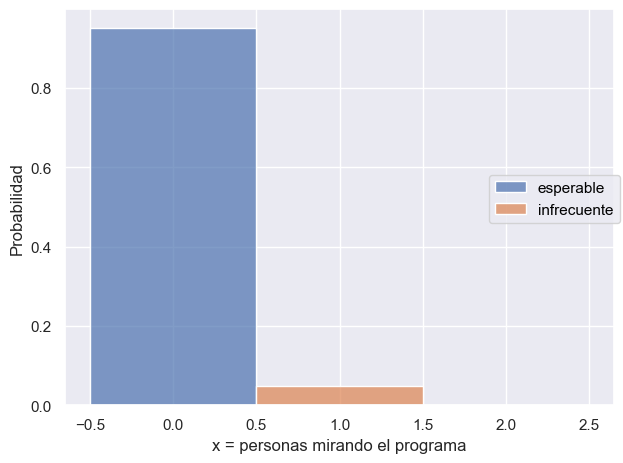

In [18]:
df_m = df_tb.round(3).set_index('x')
print(df_m)
# Añadir una columna de color
df_m['Miembros'] = ['esperable' if i < 1 else 'infrecuente' for i in df_tb['x']]

# Crear la figura y los ejes usando seaborn.objects
hist = (
    so.Plot(df_m, x='x', y='p', color='Miembros')
    .add(so.Bars())
    .label(x="x = personas mirando el programa", y="Probabilidad", color="")
)

# Mostrar el gráfico , color = df_miembros['x'][df_miembros['x'] < 8]
hist.show()

**Resultados infrecuentes:**
+ La regla del intervalo nos dice que los resultados infrecuentes son aquellos con una probabilidad acumulada menor al 5%.
+ Se utiliza la probabilidad acumulada porque aunque los resultados son muy poco probables, siguen teniendo una probabilidad.
    + Estamos hablando de una baja probabilidad de 1 o 2 o 3 o 4 o 5 de un conjunto de 5 personas expuestas a la auditoria.
    + La probabilidad acumulada (['p-acu'] ) aumenta mucho al principio (0) pero casi nada a partir de una persona.
        + Esta probabilidad se hace significativa (> 5% solo para x = 0)
    + La probabilidad acumulada invertida (['p-acr']) aumenta abruptamente a partir de 1 persona (desde 5 a 0), pero de 5 a 0 crece muy despacio.
+ Se ve como al llegar a 1 persona desde cero ya se cubre el 99% de los casos más probables. (en la probabilidad acumulada)
+ Se ve como al llegar a 1 persona desde 5 se cubre menos del 5% de los casos probables. (en la probabilidad acumulada reversa)

### Analisis de riesgo
#### ¿Existe riesgo de encontrar 1 persona con estos ingresos al hacer la auditoría?
+ ¿La probabilidad de encontrar una persona es signigicativa? 
+ ¿La probabilidad una persona así es un suceso infrecuente?

In [22]:
# Revisamos las probabilidades acumuladas untilzando el criterio el criterio visto hasta ahora:
print(df_m[['p', 'p-acu','Miembros']].iloc[::-1])
print("Ver la tabla y la grafica de probabilidad acumulada reversa (de derecha a izquierda)")

       p  p-acu     Miembros
x                           
5  0.000  1.000  infrecuente
4  0.000  1.000  infrecuente
3  0.000  1.000  infrecuente
2  0.001  1.000  infrecuente
1  0.048  0.999  infrecuente
0  0.951  0.951    esperable
Ver la tabla y la grafica de probabilidad acumulada reversa (de derecha a izquierda)


**Observación**
Como se ve en la tabla y en la grafica la cantindad de tabletas con fallas no suele ser mayor que 3:
+ Si nos remitimos a la tabla obtenemos el siguiente resultado:
    + P(0 o 1) = **0.99**. Es decir, se cubren practicamente todos los sucesos probables.

**Interpretación**
+ **0** personas es una cantidad esperable de tabletas falladas y no es un número excepcionalmente bajo.
+ Una selección y composición con 0 miembros como esta, **no implica necesariamente que se pueda encontrar una persona en la muestra.**.
+ Una selección y composición con o miembros como esta, **si implica que encontrar una persona es un suceso infrecuente (dificilmente suceda)**.

# Preguntas
#### Calcule la probabilidad de que, cuando se seleccione al azar a cinco personas que ganan entre $25,000 y $50,000, se audite exactamente a tres de ellas.

In [28]:
n = 5  # Número de sujetos
p = 0.01  # Probabilidad de encontrar 3

x = 3 # no varía. 

probabilidad_x = binom.pmf(x, n, p)

print(f"Probabilidad de exactamente {x} personas es: {probabilidad_x:.3f}")
print(f"Esta probabilidad debe coincidir con la que se calculó al construir la tabla.")

Probabilidad de exactamente 3 personas es: 0.000
Esta probabilidad debe coincidir con la que se calculó al construir la tabla P(1) + P(2) + P(3).


#### Calcule la probabilidad de que se audite al menos a tres.
Se entidende aquí, la probabilidad de 1 a 3 personas.

In [30]:
n = 5  # Número de sujetos
p = 0.01  # Probabilidad de encontrar 3

probabilidad_acum = 0
x = 0 # variara de 1 a 3 sin 0

for x in range(1,4):
  probabilidad_x = binom.pmf(x, n, p)
  probabilidad_acum += probabilidad_x

print(f"Probabilidad entre 1 y {x} personas que sean auditadas: {probabilidad_acum}")
print(f"Esta probabilidad acumulada debe coincidir con la que se calculó al construir la tabla.  P(1) + P(2) + P(3). Sin P(0).")

Probabilidad entre 1 y 3 personas que sean auditadas: 0.049009900499999995
Esta probabilidad acumulada debe coincidir con la que se calculó al construir la tabla.  P(1) + P(2) + P(3). Sin P(0).


#### Con base en los resultados anteriores, ¿qué se puede concluir acerca de los clientes de Hemingway? ¿Sólo son desafortunados o están siendo blanco de las auditorías?
Con base en lo visto aquí puede decirse que los clientes son bastante afortunados si se considera que la probabilidad de encontrar alguno que sea auditado es menor al 5%.


__________________________________________________________________________________________________________________________